In [1]:
import streamlit as st
from streamlit_option_menu import option_menu
import easyocr
import pymysql
import re
from PIL import Image
import pandas as pd 
import numpy as np
import io

C:/Users/Aishwarya MMPL/Documents/GUVI_PYTHON/Projects/bizcard/image/1.png

In [2]:
def IMG_to_TXT(path):
    Inp_Img= Image.open(path)
    Img_arr= np.array(Inp_Img)# converting image into array
    lang= easyocr.Reader(["en"]) #define reader language 
    text= lang.readtext(Img_arr, detail=0)
    return text, Inp_Img

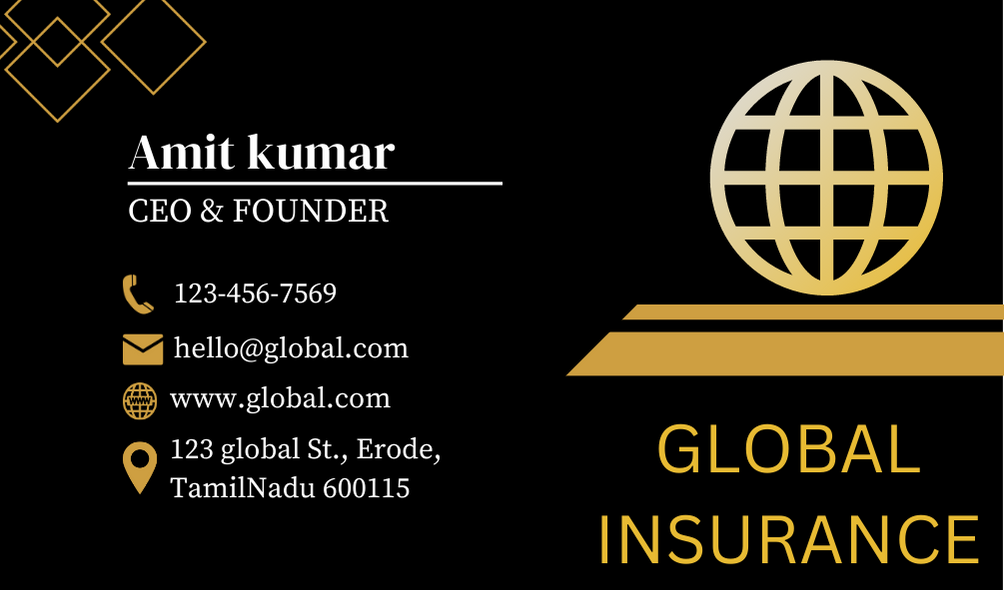

In [8]:
Inp_Img

In [3]:
text,Inp_Img =IMG_to_TXT("C:/Users/Aishwarya MMPL/Documents/GUVI_PYTHON/Projects/bizcard/image/2.png")
text,Inp_Img

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


(['Amit kumar',
  'CEO & FOUNDER',
  '123-456-7569',
  'hello@global.com',
  'WWW',
  'global.com',
  '123 global',
  'Erode,',
  'GLOBAL',
  'TamilNadu 600115',
  'INSURANCE',
  'St ,'],
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1004x590>)

In [4]:
def TXT_EXTRACT(text):

    list={"NAME":[],"DESIGNATION": [],"COMPANY_NAME":[],"CONTACT":[],"EMAIL_ID":[],"WEBSITE":[],"ADDRESS":[],"PINCODE":[]}

    list["NAME"].append(text[0])
    list["DESIGNATION"].append(text[1])
    for i in range(2,len(text)):
        if text[i].startswith("+") or (text[i].replace("-","").isdigit() and "-" in text[i]):
            list["CONTACT"].append(text[i])
        elif "@" in text[i] and (text[i].endswith(".com")):
            list["EMAIL_ID"].append(text[i])
        elif "WWW" in text[i] or "www" in text[i] or "Www" in text[i] or "wWw" in text[i] or "wwW" in text[i]:
            web=text[i].lower()
            list["WEBSITE"].append(web)
        # elif "@" not in text[i] and (text[i].endswith(".com")):
        #     list["WEBSITE"].append(text[i])
        elif "TamilNadu" in text[i] or "Tamil Nadu" in text[i] or text[i].isdigit():
            list["PINCODE"].append(text[i])
        elif re.match (r'^[A-Z,a-z]',text[i]):
            list["COMPANY_NAME"].append(text[i])
        else:
            remove= re.sub(r'^[,;]','',text[i])
            list["ADDRESS"].append(remove)
    
    for key, value in list.items():
        if len(value)>0:
            concate= " ".join(value)
            list[key]=[concate]
        else:
            value= "NA"
            list[key]=[value]


    return list

In [5]:
TEXDIC= TXT_EXTRACT(text)
df= pd.DataFrame(TEXDIC)
df

,NAME,DESIGNATION,COMPANY_NAME,CONTACT,EMAIL_ID,WEBSITE,ADDRESS,PINCODE
0,Amit kumar,CEO & FOUNDER,"global.com Erode, GLOBAL INSURANCE St ,",123-456-7569,hello@global.com,www,123 global,TamilNadu 600115


In [6]:
#coverting Image into Bits 

Image_Bytes = io.BytesIO()
Inp_Img.save(Image_Bytes,format="PNG")

IMG_DATA= Image_Bytes.getvalue()
IMG_DATA

dict= {"IMAGE":[IMG_DATA]}
df_1=pd.DataFrame(dict)
df_1

JOIN = pd.concat([df,df_1],axis=1)


In [77]:
JOIN

,NAME,DESIGNATION,COMPANY_NAME,CONTACT,EMAIL_ID,WEBSITE,ADDRESS,PINCODE,IMAGE
0,Amit kumar,CEO & FOUNDER,"global.com Erode, GLOBAL INSURANCE St ,",123-456-7569,hello@global.com,www,123 global,TamilNadu 600115,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...


In [7]:
myconnection = pymysql.connect(host = '127.0.0.1',user='root',passwd='root',database = "bizcard",port=3306)
cur = myconnection.cursor()

In [8]:
#SQL CONNECTION
myconnection = pymysql.connect(host = '127.0.0.1',user='root',passwd='root',database = "bizcard",port=3306)
cur = myconnection.cursor()

Create_Query='''create table if not exists BIZCARD(NAME char(255), DESIGNATION char(255), COMPANY_NAME char(255), CONTACT char(255), 
                    EMAIL_ID char(255), WEBSITE text, ADDRESS text, PINCODE char(255), IMAGE text)'''

cur.execute(Create_Query)
myconnection.commit()


In [8]:
Insert_Query='''insert into BIZCARD(NAME, DESIGNATION, COMPANY_NAME, CONTACT, EMAIL_ID, WEBSITE, ADDRESS, PINCODE,  IMAGE)
                        values(%s,%s,%s,%s,%s,%s,%s,%s,%s)'''

Values= JOIN.values.tolist()[0]
cur.execute(Insert_Query,Values)
myconnection.commit()

In [9]:
#SQL CONNECTION
myconnection = pymysql.connect(host = '127.0.0.1',user='root',passwd='root',database = "bizcard",port=3306)
cur = myconnection.cursor()

cur.execute("select NAME from bizcard")
Table= cur.fetchall()
myconnection.commit()

Names1=[]
for i in Table:
    Names1.append(i[0])

['SANTHOSH', 'REVANTH', 'KARTHICK', 'Selva']